In [1]:
import glob
import fitsio
import proplot as pplt
import numpy as np

In [2]:
import random

fnames = sorted(glob.glob("./data_final_nogcut/*.fits"))
n_keep = 2

random.shuffle(fnames)

In [121]:
import tqdm

d = []
for i in tqdm.trange(n_keep):
    d.append(fitsio.read(fnames[i]))
d = np.concatenate(d)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.35s/it]


Text(0, 0.5, 'T')

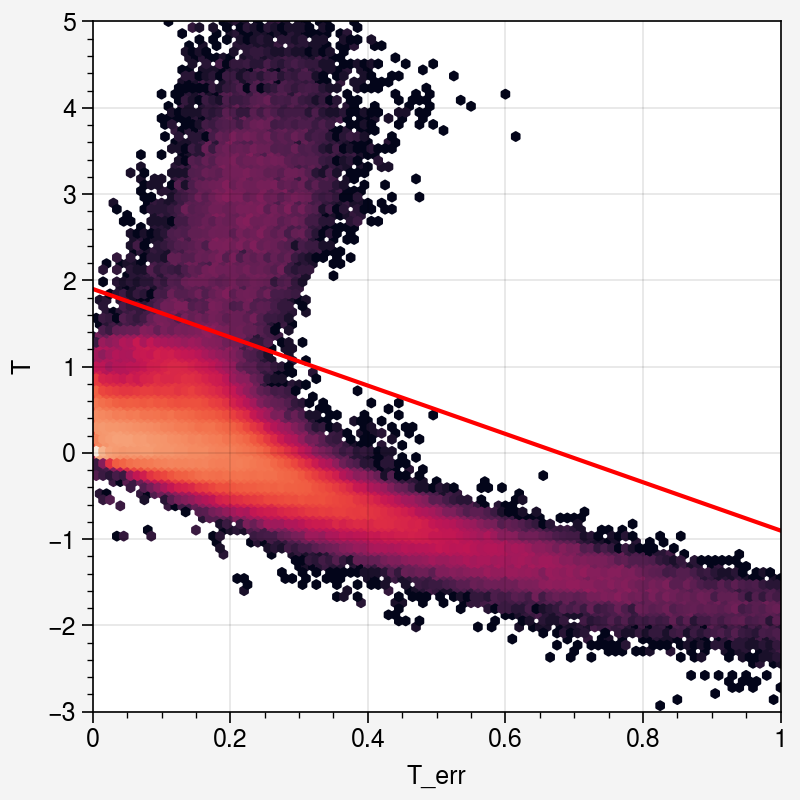

In [123]:
import matplotlib.pyplot as plt

msk = (
    # (d["flags"] == 0)
    (d["mask_flags"] == 0)
    & (d["mfrac"] < 0.1)
    & (d["mdet_s2n"] > 2)
    # & (d["mdet_T"] < (1.4 - 2.6 * d["mdet_T_err"]))
)

xx = np.linspace(0, 1, 100)
yy = 1.9 - 2.8*xx

fig, axs = pplt.subplots(figsize=(4, 4))
axs.hexbin(
    d["mdet_T_err"][msk],
    d["mdet_T"][msk], 
    norm="log",
    cmap="rocket",
    extent=(0, 1, -3, 5)
)
axs.plot(xx, yy, color="r")
# axs.axhline(np.log10(0.5), color="cyan")
axs.set_xlim(0, 1)
axs.set_ylim(-3, 5)
axs.set_xlabel("T_err")
axs.set_ylabel("T")

/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/95166265.py:4: RuntimeWarning: invalid value encountered in log10
  mag_g = 30.0 - 2.5*np.log10(d["mdet_g_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/95166265.py:5: RuntimeWarning: invalid value encountered in log10
  mag_r = 30.0 - 2.5*np.log10(d["mdet_r_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/95166265.py:6: RuntimeWarning: invalid value encountered in log10
  mag_i = 30.0 - 2.5*np.log10(d["mdet_i_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/95166265.py:7: RuntimeWarning: invalid value encountered in log10
  mag_z = 30.0 - 2.5*np.log10(d["mdet_z_flux"])


Text(0, 0.5, 'T/Tpsf')

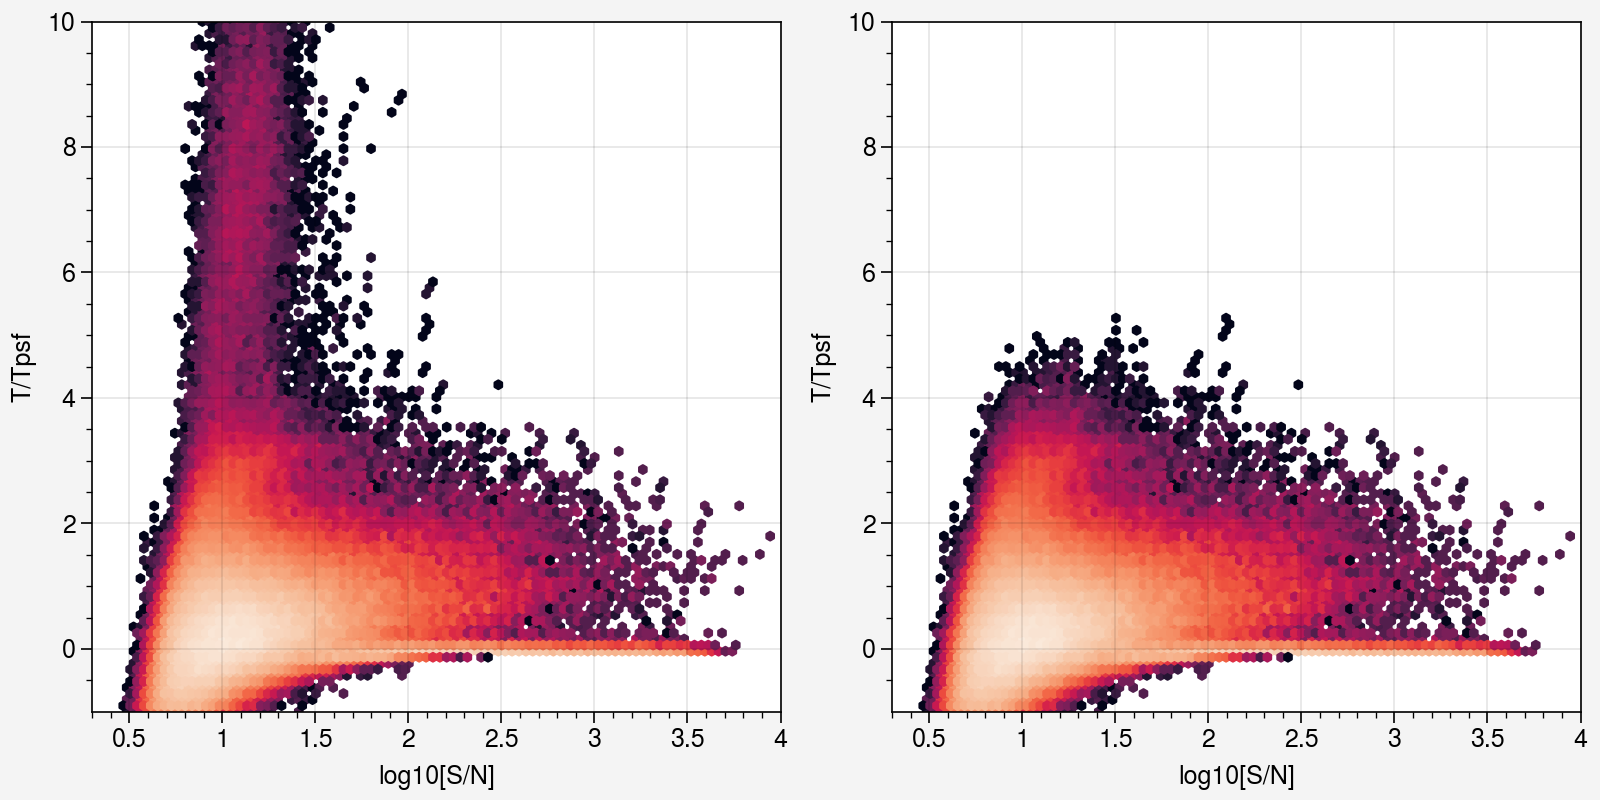

In [125]:
import ngmix.flags

# compute mags - some will be nan
mag_g = 30.0 - 2.5*np.log10(d["mdet_g_flux"])
mag_r = 30.0 - 2.5*np.log10(d["mdet_r_flux"])
mag_i = 30.0 - 2.5*np.log10(d["mdet_i_flux"])
mag_z = 30.0 - 2.5*np.log10(d["mdet_z_flux"])
gmr = mag_g - mag_r
rmi = mag_r - mag_i
imz = mag_i - mag_z

# then cuts
msk = (
    ((d["flags"] & ngmix.flags.NONPOS_VAR) == 0)
    & ((d["flags"] & ngmix.flags.NONPOS_SHAPE_VAR) == 0)
    & (d["mask_flags"] == 0)
    & (d["mdet_flux_flags"] == 0)
    & (d["mdet_T_ratio"] > -1)
    & (d["mdet_s2n"] > 2)
    & (d["mfrac"] < 0.1)
    & (np.abs(gmr) < 5)
    & (np.abs(rmi) < 5)
    & (np.abs(imz) < 5)
    & np.isfinite(mag_g)
    & np.isfinite(mag_r)
    & np.isfinite(mag_i)
    & np.isfinite(mag_z)
    & (mag_g < 26.5)
    & (mag_r < 26.5)
    & (mag_i < 26.2)
    & (mag_z < 25.6)
)

fig, axss = pplt.subplots(nrows=1, ncols=2, figsize=(8, 4), share=0)

axs = axss[0, 0]

axs.hexbin(
    np.log10(d["mdet_s2n"][msk]), 
    d["mdet_T_ratio"][msk], 
    norm="log", 
    cmap="rocket",
    extent=(0.3, 4, -1, 10)
)
# axs.axhline(np.log10(0.5), color="cyan")
axs.set_ylim(-1, 10)
axs.set_xlim(0.3, 4)
axs.set_xlabel("log10[S/N]")
axs.set_ylabel("T/Tpsf")

axs = axss[0, 1]
msk &= (d["mdet_T"] < 1.9 - 2.8*d["mdet_T_err"])
axs.hexbin(
    np.log10(d["mdet_s2n"][msk]), 
    d["mdet_T_ratio"][msk], 
    norm="log", 
    cmap="rocket",
    extent=(0.3, 4, -1, 10)
)
# axs.axhline(np.log10(0.5), color="cyan")
axs.set_ylim(-1, 10)
axs.set_xlim(0.3, 4)
axs.set_xlabel("log10[S/N]")
axs.set_ylabel("T/Tpsf")

Text(0, 0.5, 'T')

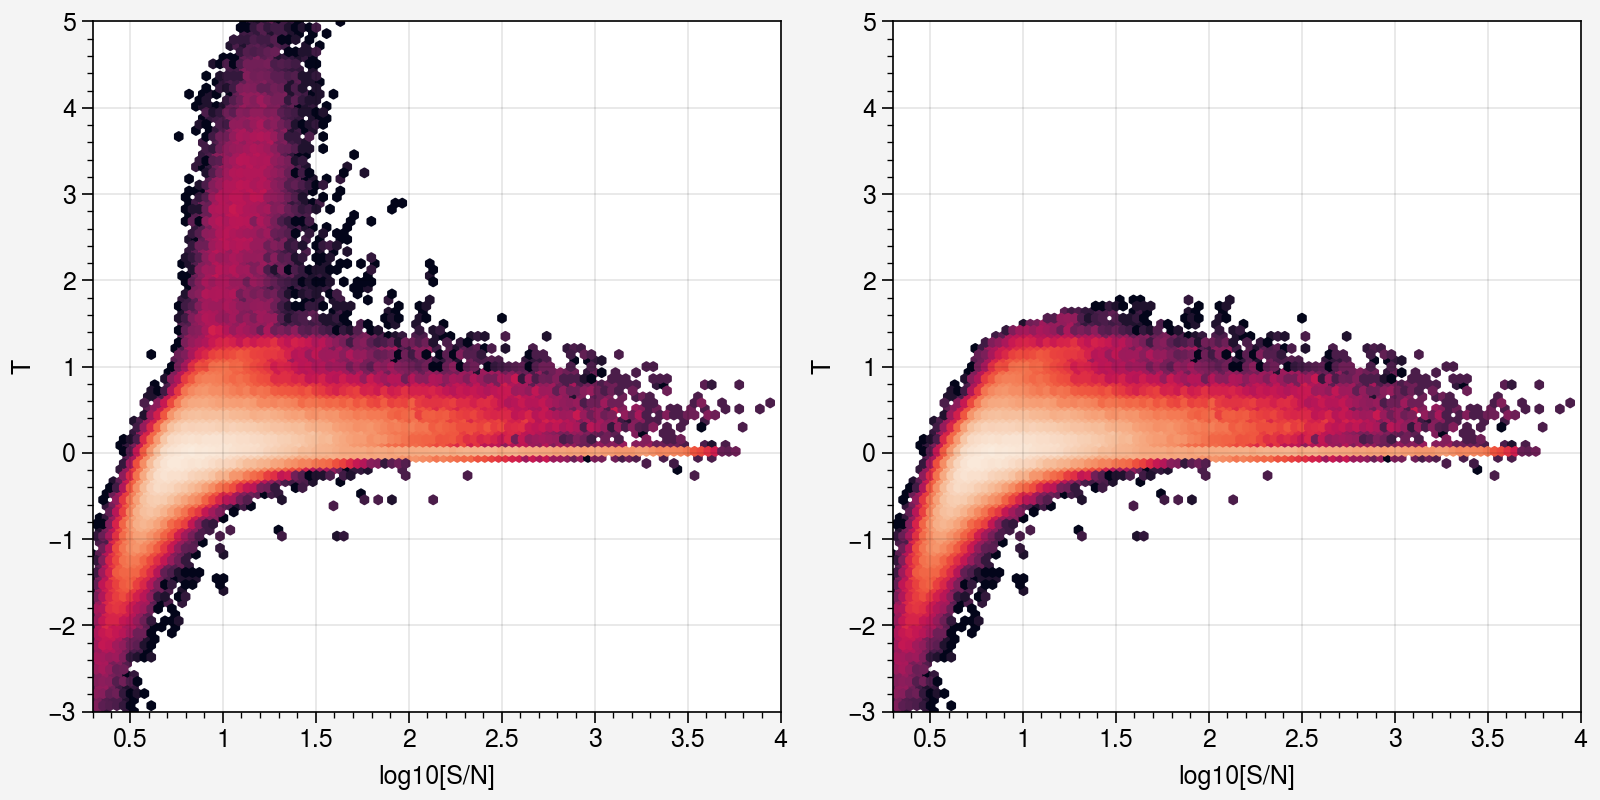

In [109]:
fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(8, 4), share=0)

msk = (
    (d["mask_flags"] == 0)
    & (d["mfrac"] < 0.1)
    & (d["mdet_s2n"] > 2)
    # & (d["mdet_T"] < (1.6 - 2.8 * d["mdet_T_err"] + 0.3))
)
ax = axs[0, 0]
ax.hexbin(
    np.log10(d["mdet_s2n"][msk]), 
    d["mdet_T"][msk], 
    norm="log", 
    cmap="rocket",
    extent=(0.3, 4, -3, 5)
)
ax.set_ylim(-3, 5)
ax.set_xlim(0.3, 4)
ax.set_xlabel("log10[S/N]")
ax.set_ylabel("T")

msk = (
    (d["mask_flags"] == 0)
    & (d["mfrac"] < 0.1)
    & (d["mdet_s2n"] > 2)
    & (d["mdet_T"] < (1.6 - 2.8 * d["mdet_T_err"] + 0.3))
)

ax = axs[0, 1]
ax.hexbin(
    np.log10(d["mdet_s2n"][msk]), 
    d["mdet_T"][msk], 
    norm="log", 
    cmap="rocket",
    extent=(0.3, 4, -3, 5)
)
# axs.axhline(np.log10(0.5), color="cyan")
ax.set_ylim(-3, 5)
ax.set_xlim(0.3, 4)
ax.set_xlabel("log10[S/N]")
ax.set_ylabel("T")

In [59]:
msk = (
    (d["mask_flags"] == 0)
    & (d["mfrac"] < 0.1)
    & (d["mdet_s2n"] > 10)
)

tmsk = (d["mdet_T"] < (1.4 - 2.6 * d["mdet_T_err"]))
np.sum(tmsk & msk) / np.sum(msk)


0.9680891937771133

Text(0, 0.5, 'T')

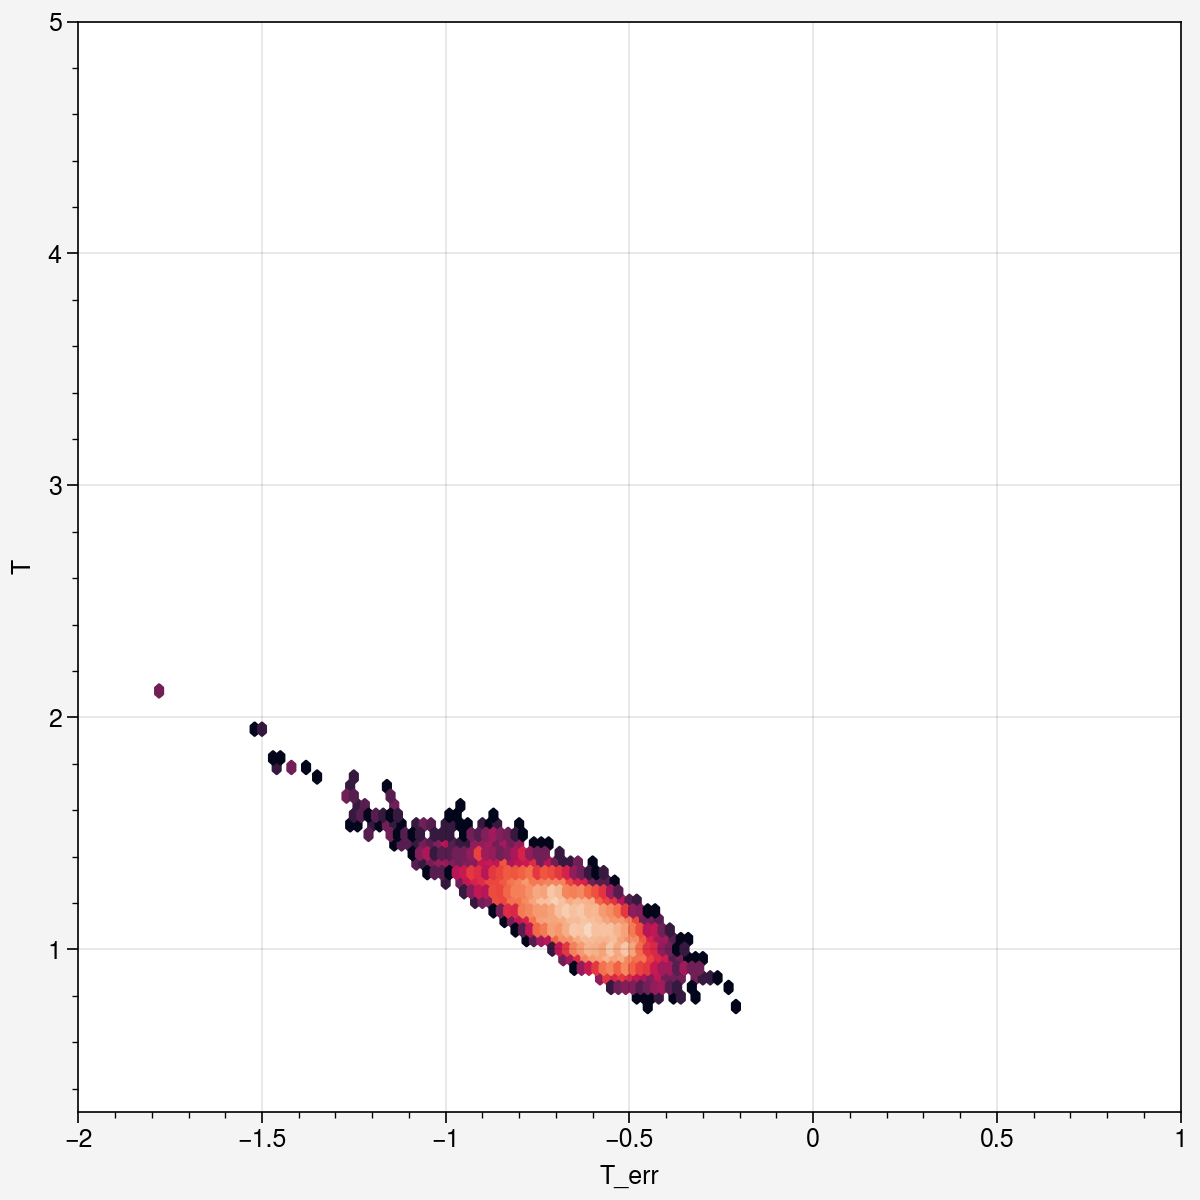

In [48]:
msk = (
    (d["mask_flags"] == 0)
    & (d["mfrac"] < 0.1)
    & (d["mdet_s2n"] > 2)
    & (d["mdet_T"] > 2)
)

fig, axs = pplt.subplots(figsize=(6, 6))
axs.hexbin(
    np.log10(d["mdet_T_err"][msk]),
    np.log10(d["mdet_s2n"][msk]), 
    bins=100, 
    norm="log", 
    cmap="rocket",
    extent=(-2, 0, 0.3, 5)
)
# axs.axhline(np.log10(0.5), color="cyan")
axs.set_xlim(-2, 1)
axs.set_ylim(0.3, 5)
axs.set_xlabel("T_err")
axs.set_ylabel("T")

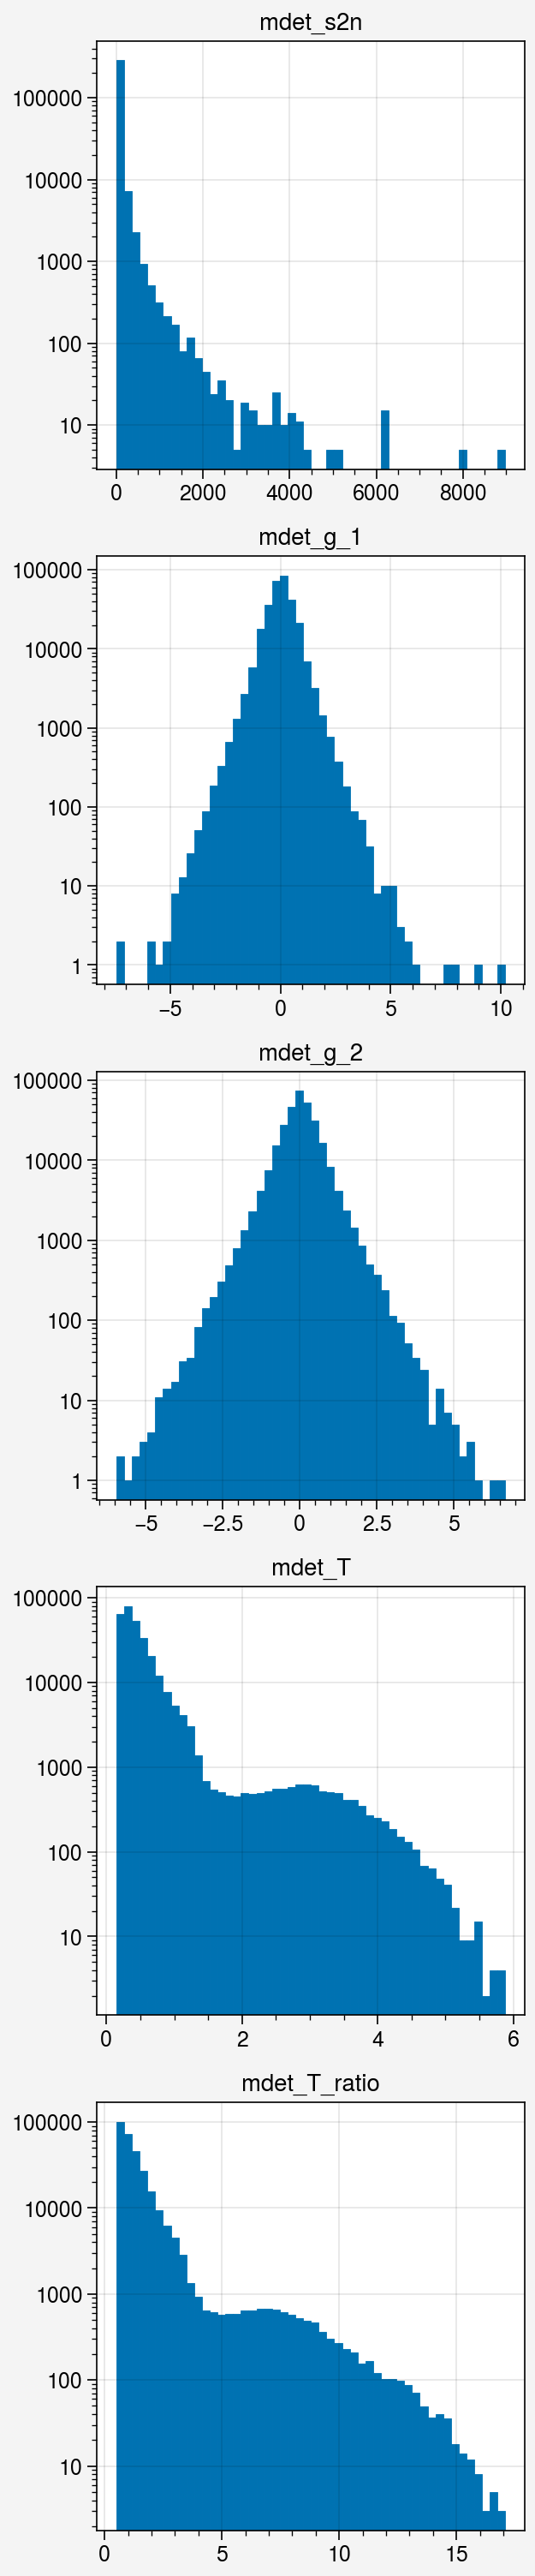

In [8]:
cols = ["mdet_s2n", "mdet_g_1", "mdet_g_2", "mdet_T", "mdet_T_ratio"]
msk = (
    (d["flags"] == 0) 
    & (d["mask_flags"] == 0)
    & (d["mdet_flux_flags"] == 0)
    & (d["mdet_T_ratio"] > 0.5)
    & (d["mdet_s2n"] > 2)
)
fig, axs = pplt.subplots(ncols=1, nrows=len(cols), share=0)

for i, col in enumerate(cols):
    ax = axs[i, 0]
    ax.hist(d[col][msk], bins=50, log=True)
    ax.set_title(col)

/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/807917269.py:9: RuntimeWarning: invalid value encountered in log10
  30.0 - 2.5*np.log10(d["mdet_g_flux"][msk]),
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/807917269.py:10: RuntimeWarning: invalid value encountered in log10
  30.0 - 2.5*np.log10(d["mdet_r_flux"][msk]),
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/807917269.py:11: RuntimeWarning: invalid value encountered in log10
  30.0 - 2.5*np.log10(d["mdet_i_flux"][msk]),
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/807917269.py:12: RuntimeWarning: invalid value encountered in log10
  30.0 - 2.5*np.log10(d["mdet_z_flux"][msk]),


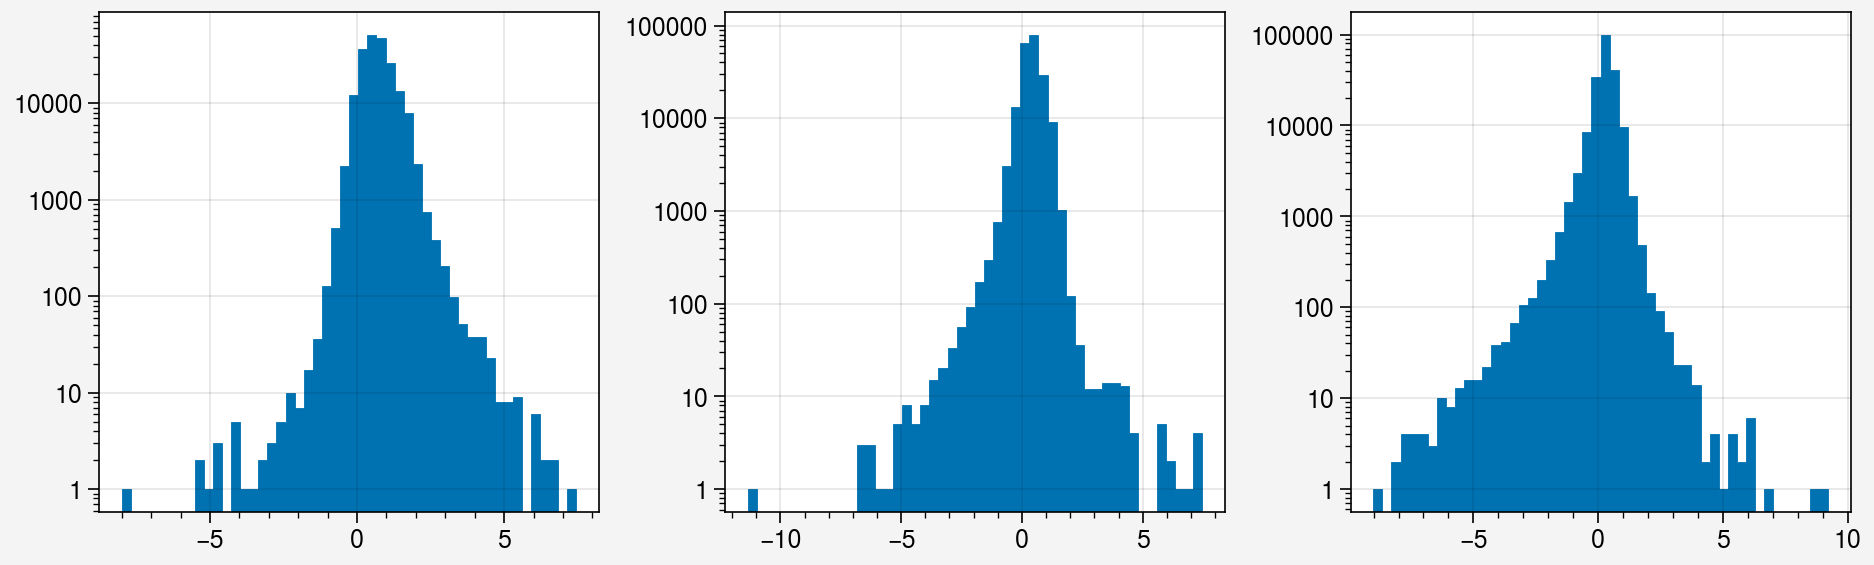

In [14]:
msk = (
    (d["flags"] == 0) 
    & (d["mask_flags"] == 0)
    & (d["mdet_flux_flags"] == 0)
    & (d["mdet_T_ratio"] > 0.5)
    & (d["mdet_s2n"] > 10)
)
mags = [
    30.0 - 2.5*np.log10(d["mdet_g_flux"][msk]),
    30.0 - 2.5*np.log10(d["mdet_r_flux"][msk]),
    30.0 - 2.5*np.log10(d["mdet_i_flux"][msk]),
    30.0 - 2.5*np.log10(d["mdet_z_flux"][msk]),
]

fig, axs = pplt.subplots(ncols=3, nrows=1, share=0)

for i in range(3):
    ax = axs[0, i]
    ax.hist(mags[i]-mags[i+1], bins=50, log=True)


/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/378743920.py:1: RuntimeWarning: invalid value encountered in log10
  mag_g = 30.0 - 2.5*np.log10(d["mdet_g_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/378743920.py:2: RuntimeWarning: invalid value encountered in log10
  mag_r = 30.0 - 2.5*np.log10(d["mdet_r_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/378743920.py:3: RuntimeWarning: invalid value encountered in log10
  mag_i = 30.0 - 2.5*np.log10(d["mdet_i_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_16936/378743920.py:4: RuntimeWarning: invalid value encountered in log10
  mag_z = 30.0 - 2.5*np.log10(d["mdet_z_flux"])


0.9801253268860709


Text(0, 0.5, 'T')

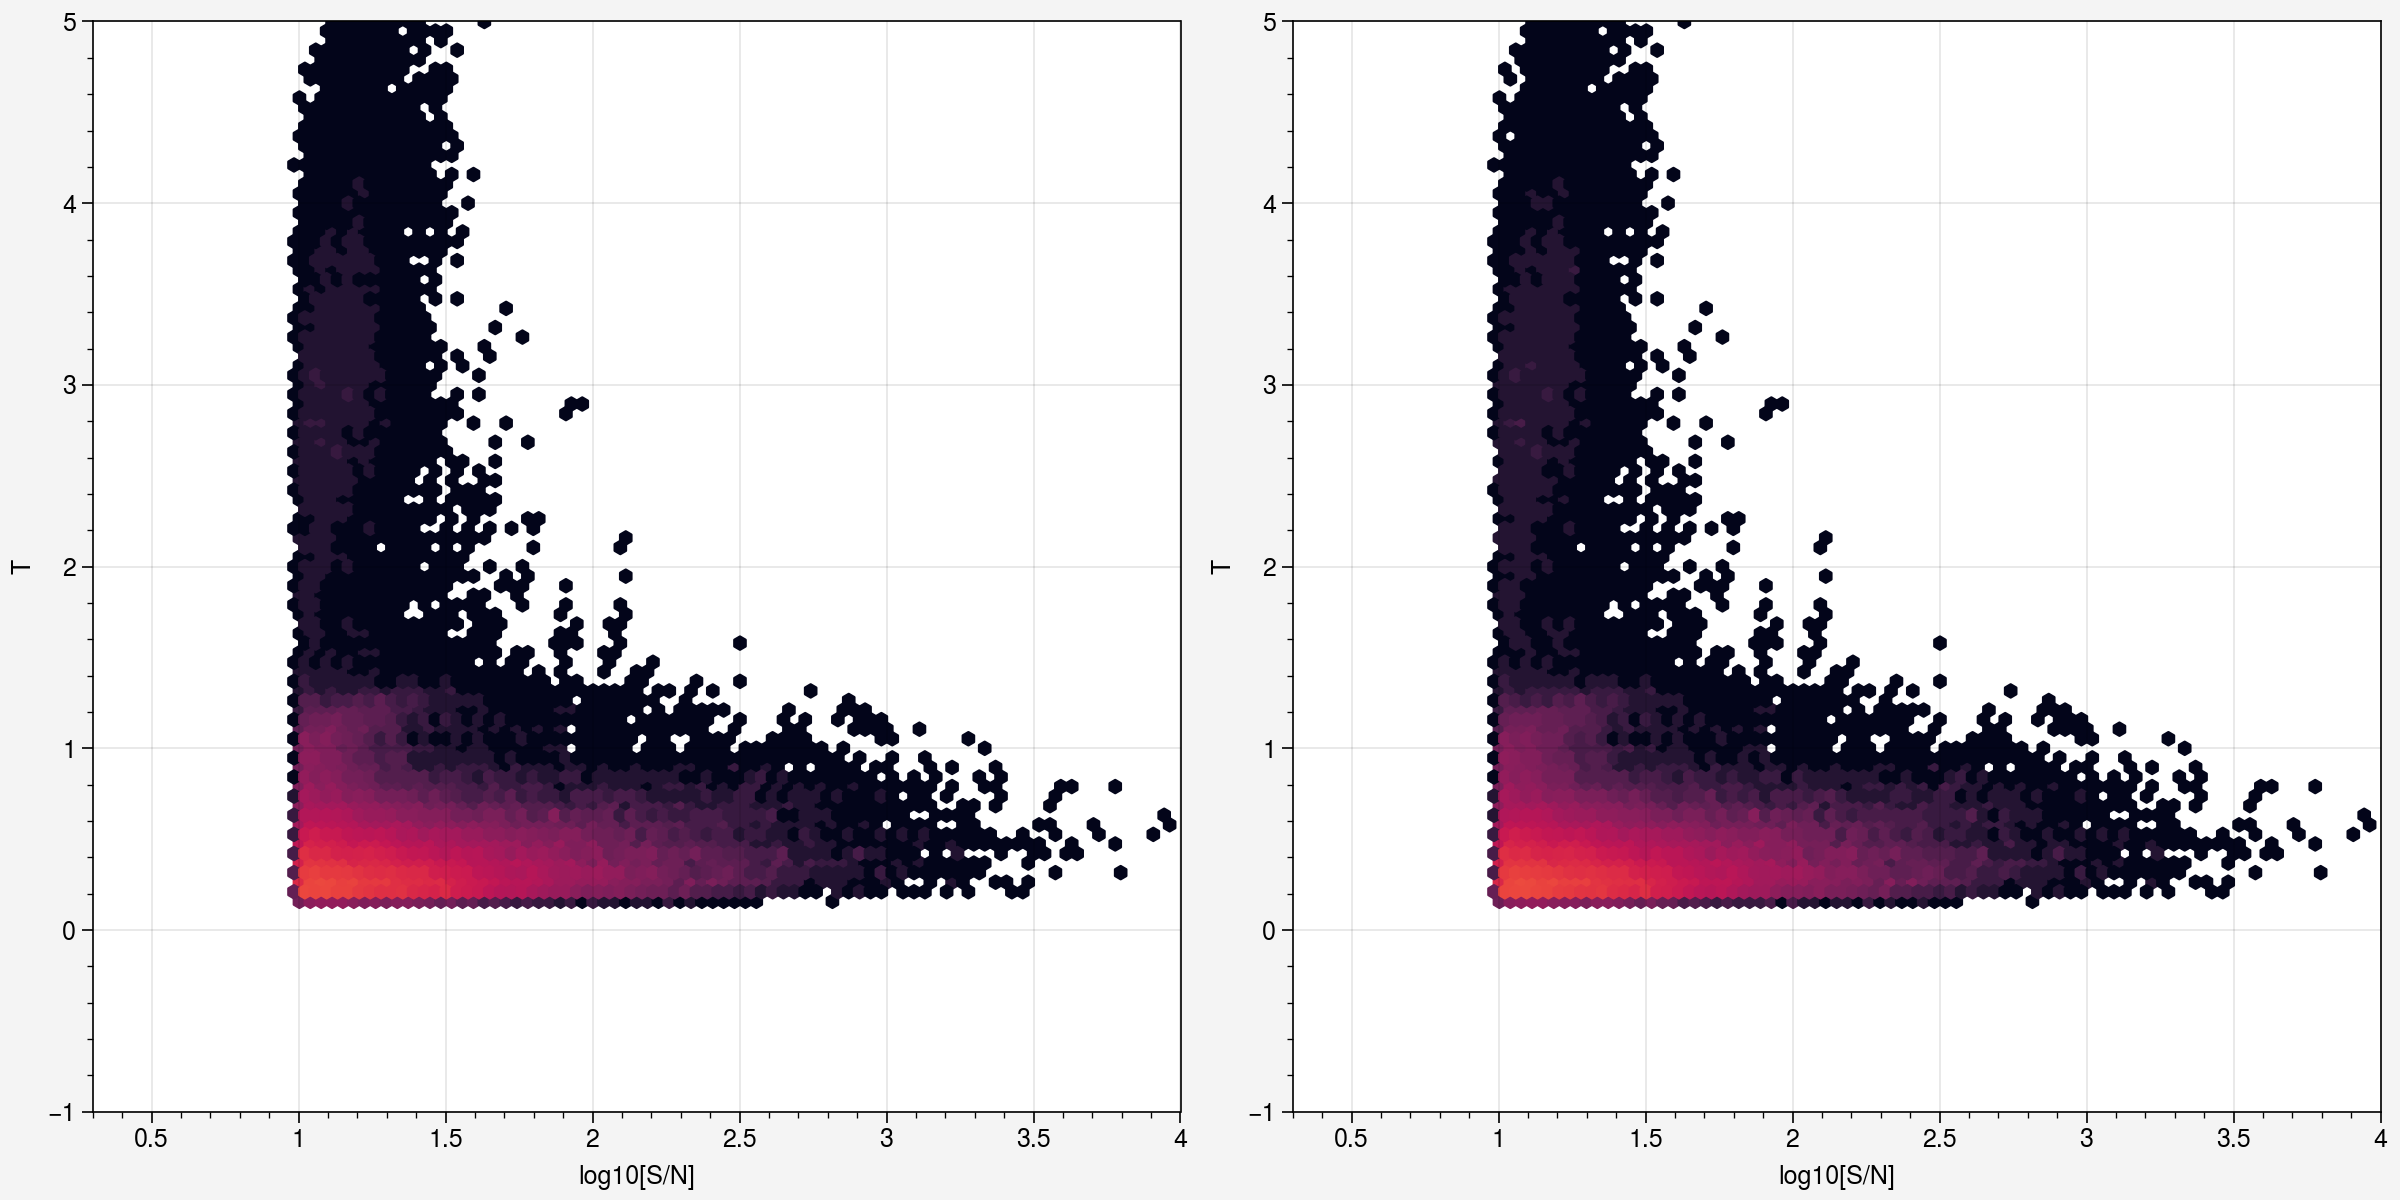

In [40]:
mag_g = 30.0 - 2.5*np.log10(d["mdet_g_flux"])
mag_r = 30.0 - 2.5*np.log10(d["mdet_r_flux"])
mag_i = 30.0 - 2.5*np.log10(d["mdet_i_flux"])
mag_z = 30.0 - 2.5*np.log10(d["mdet_z_flux"])
gmr = mag_g - mag_r
rmi = mag_r - mag_i
imz = mag_i - mag_z

# [26.5,26.5,26.2,25.6]

msk = (
    (d["flags"] == 0) 
    & (d["mask_flags"] == 0)
    & (d["mdet_flux_flags"] == 0)
    & (d["mdet_T_ratio"] > 0.5)
    & (d["mdet_s2n"] > 10)
    & (d["mfrac"] < 0.1)
)


cmsk = (
    (np.abs(gmr) < 5)
    & (np.abs(rmi) < 5)
    & (np.abs(imz) < 5)
    & np.isfinite(mag_g)
    & np.isfinite(mag_r)
    & np.isfinite(mag_i)
    & np.isfinite(mag_z)
    & (mag_g < 26.5)
    & (mag_r < 26.5)
    & (mag_i < 26.2)
    & (mag_z < 25.6)
)

print(np.sum(cmsk & msk) / np.sum(msk))

fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(12, 6), share=0)
ax = axs[0]
ax.hexbin(
    np.log10(d["mdet_s2n"][msk]), 
    d["mdet_T"][msk], 
    bins=100, 
    norm="log", 
    cmap="rocket",
    extent=(0.3, 4, -1, 5)
)
# axs.axhline(np.log10(0.5), color="cyan")
ax.set_ylim(-1, 5)
ax.set_xlim(0.3, 4)
ax.set_xlabel("log10[S/N]")
ax.set_ylabel("T")

ax = axs[1]
ax.hexbin(
    np.log10(d["mdet_s2n"][msk & cmsk]), 
    d["mdet_T"][msk & cmsk], 
    bins=100, 
    norm="log", 
    cmap="rocket",
    extent=(0.3, 4, -1, 5)
)
# axs.axhline(np.log10(0.5), color="cyan")
ax.set_ylim(-1, 5)
ax.set_xlim(0.3, 4)
ax.set_xlabel("log10[S/N]")
ax.set_ylabel("T")

In [36]:
for col in d.dtype.names:
    print(col, d[col][msk][0:10].tolist())

slice_id [5, 5, 5, 11, 11, 11, 11, 11, 40, 40]
mdet_step ['1p', '1m', '2m', 'noshear', '1p', '1m', '2p', '2m', 'noshear', 'noshear']
ra [306.93618546906384, 306.9362064180703, 306.9362606363686, 306.8683546829624, 306.86831968294814, 306.86840959118257, 306.868338362514, 306.86835995116354, 306.5601873750832, 306.55875047854107]
dec [-47.45509657849821, -47.45505274513735, -47.455089179463755, -47.45681612781485, -47.45682001086713, -47.45681453584985, -47.45679351366335, -47.45683703820781, -47.455900133977615, -47.45515386947907]
ra_noshear [306.9361949898465, 306.9361970116141, 306.93623255238595, 306.8683546829624, 306.86835946672636, 306.86837031198473, 306.868344685605, 306.86835387450606, 306.5601873750832, 306.55875047854107]
dec_noshear [-47.45507759824846, -47.45507197237982, -47.45508312268134, -47.45681612781485, -47.456815844489526, -47.45681871495195, -47.456820399569565, -47.456810256212925, -47.455900133977615, -47.45515386947907]
y_noshear [125.6641845703125, 125.74108

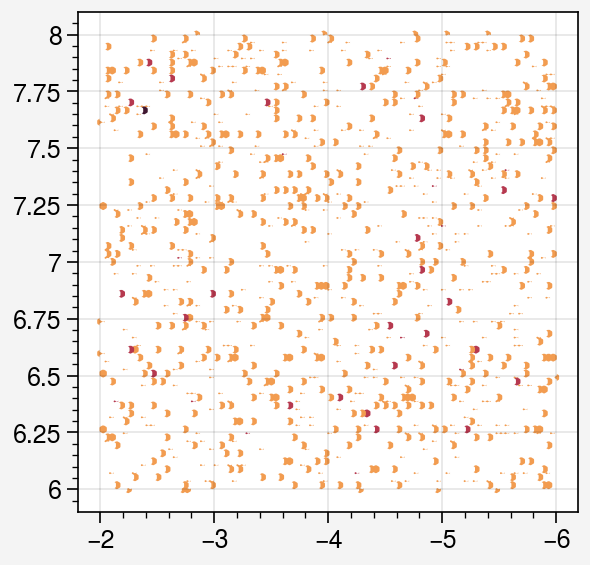

In [19]:
import proplot as pplt
import numpy as np

rng = np.random.RandomState(seed=10)
x = rng.uniform(size=1000)*4 - 6
y = rng.uniform(size=1000)*2 + 6

fig, axs = pplt.subplots()
axs.hexbin(x, y)

In [12]:
d.dtype.names

('slice_id',
 'mdet_step',
 'ra',
 'dec',
 'ra_noshear',
 'dec_noshear',
 'y_noshear',
 'x_noshear',
 'y',
 'x',
 'slice_y',
 'slice_x',
 'slice_y_noshear',
 'slice_x_noshear',
 'hpix_16384',
 'hpix_16384_noshear',
 'filename',
 'tilename',
 'flags',
 'psf_flags',
 'psf_g_1',
 'psf_g_2',
 'psf_T',
 'mdet_flags',
 'mdet_s2n',
 'mdet_g_1',
 'mdet_g_2',
 'mdet_g_cov_1_1',
 'mdet_g_cov_1_2',
 'mdet_g_cov_2_2',
 'mdet_T',
 'mdet_T_err',
 'mdet_T_ratio',
 'ormask',
 'mfrac',
 'bmask',
 'mask_flags',
 'ormask_noshear',
 'mfrac_noshear',
 'bmask_noshear',
 'mask_flags_noshear',
 'psfrec_flags',
 'psfrec_g_1',
 'psfrec_g_2',
 'psfrec_T',
 'mdet_flux_flags',
 'mdet_g_flux',
 'mdet_r_flux',
 'mdet_i_flux',
 'mdet_z_flux',
 'mdet_g_flux_err',
 'mdet_r_flux_err',
 'mdet_i_flux_err',
 'mdet_z_flux_err',
 'nepoch_g',
 'nepoch_r',
 'nepoch_i',
 'nepoch_z',
 'nepoch_eff_g',
 'nepoch_eff_r',
 'nepoch_eff_i',
 'nepoch_eff_z')

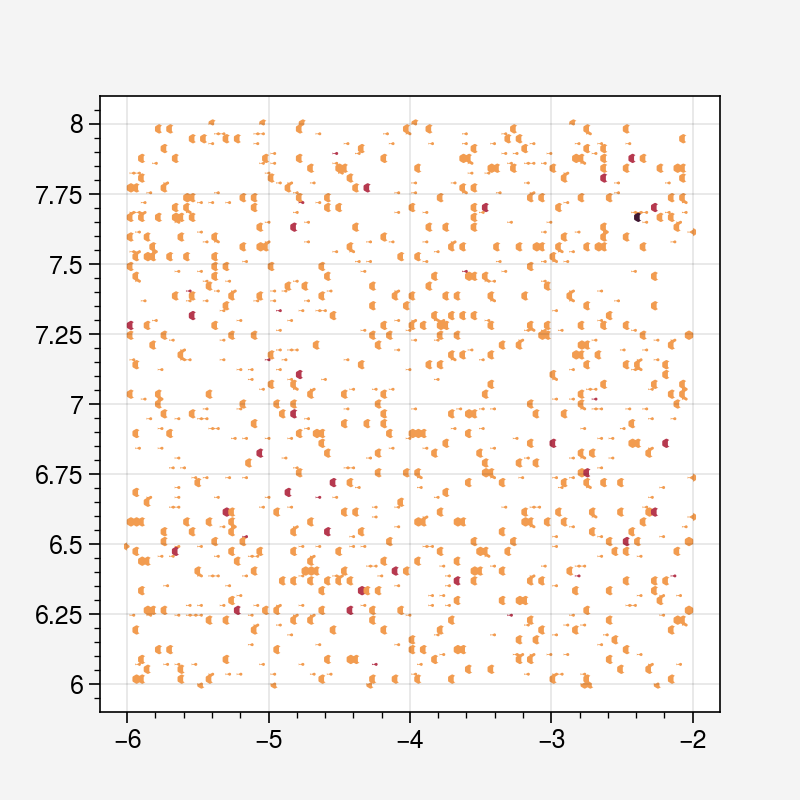

In [21]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(seed=10)
x = rng.uniform(size=1000)*4 - 6
y = rng.uniform(size=1000)*2 + 6

fig, axs = plt.subplots(nrows=1, ncols=1)
axs.hexbin(x, y)

In [14]:
import matplotlib; print(matplotlib.__version__); import proplot; print(proplot.version)

3.5.0
0.9.5


In [4]:
msk = (
    (d["flags"] == 0)
    & (d["mask_flags"] == 0)
    & (d["mdet_s2n"] > 10)
    & (d["mdet_s2n"] <= 100)    
    & (d["mdet_T_ratio"] > 0.5)
    & (d["mdet_T"] < 1.2)
    & (d["mfrac"] < 0.1)
)

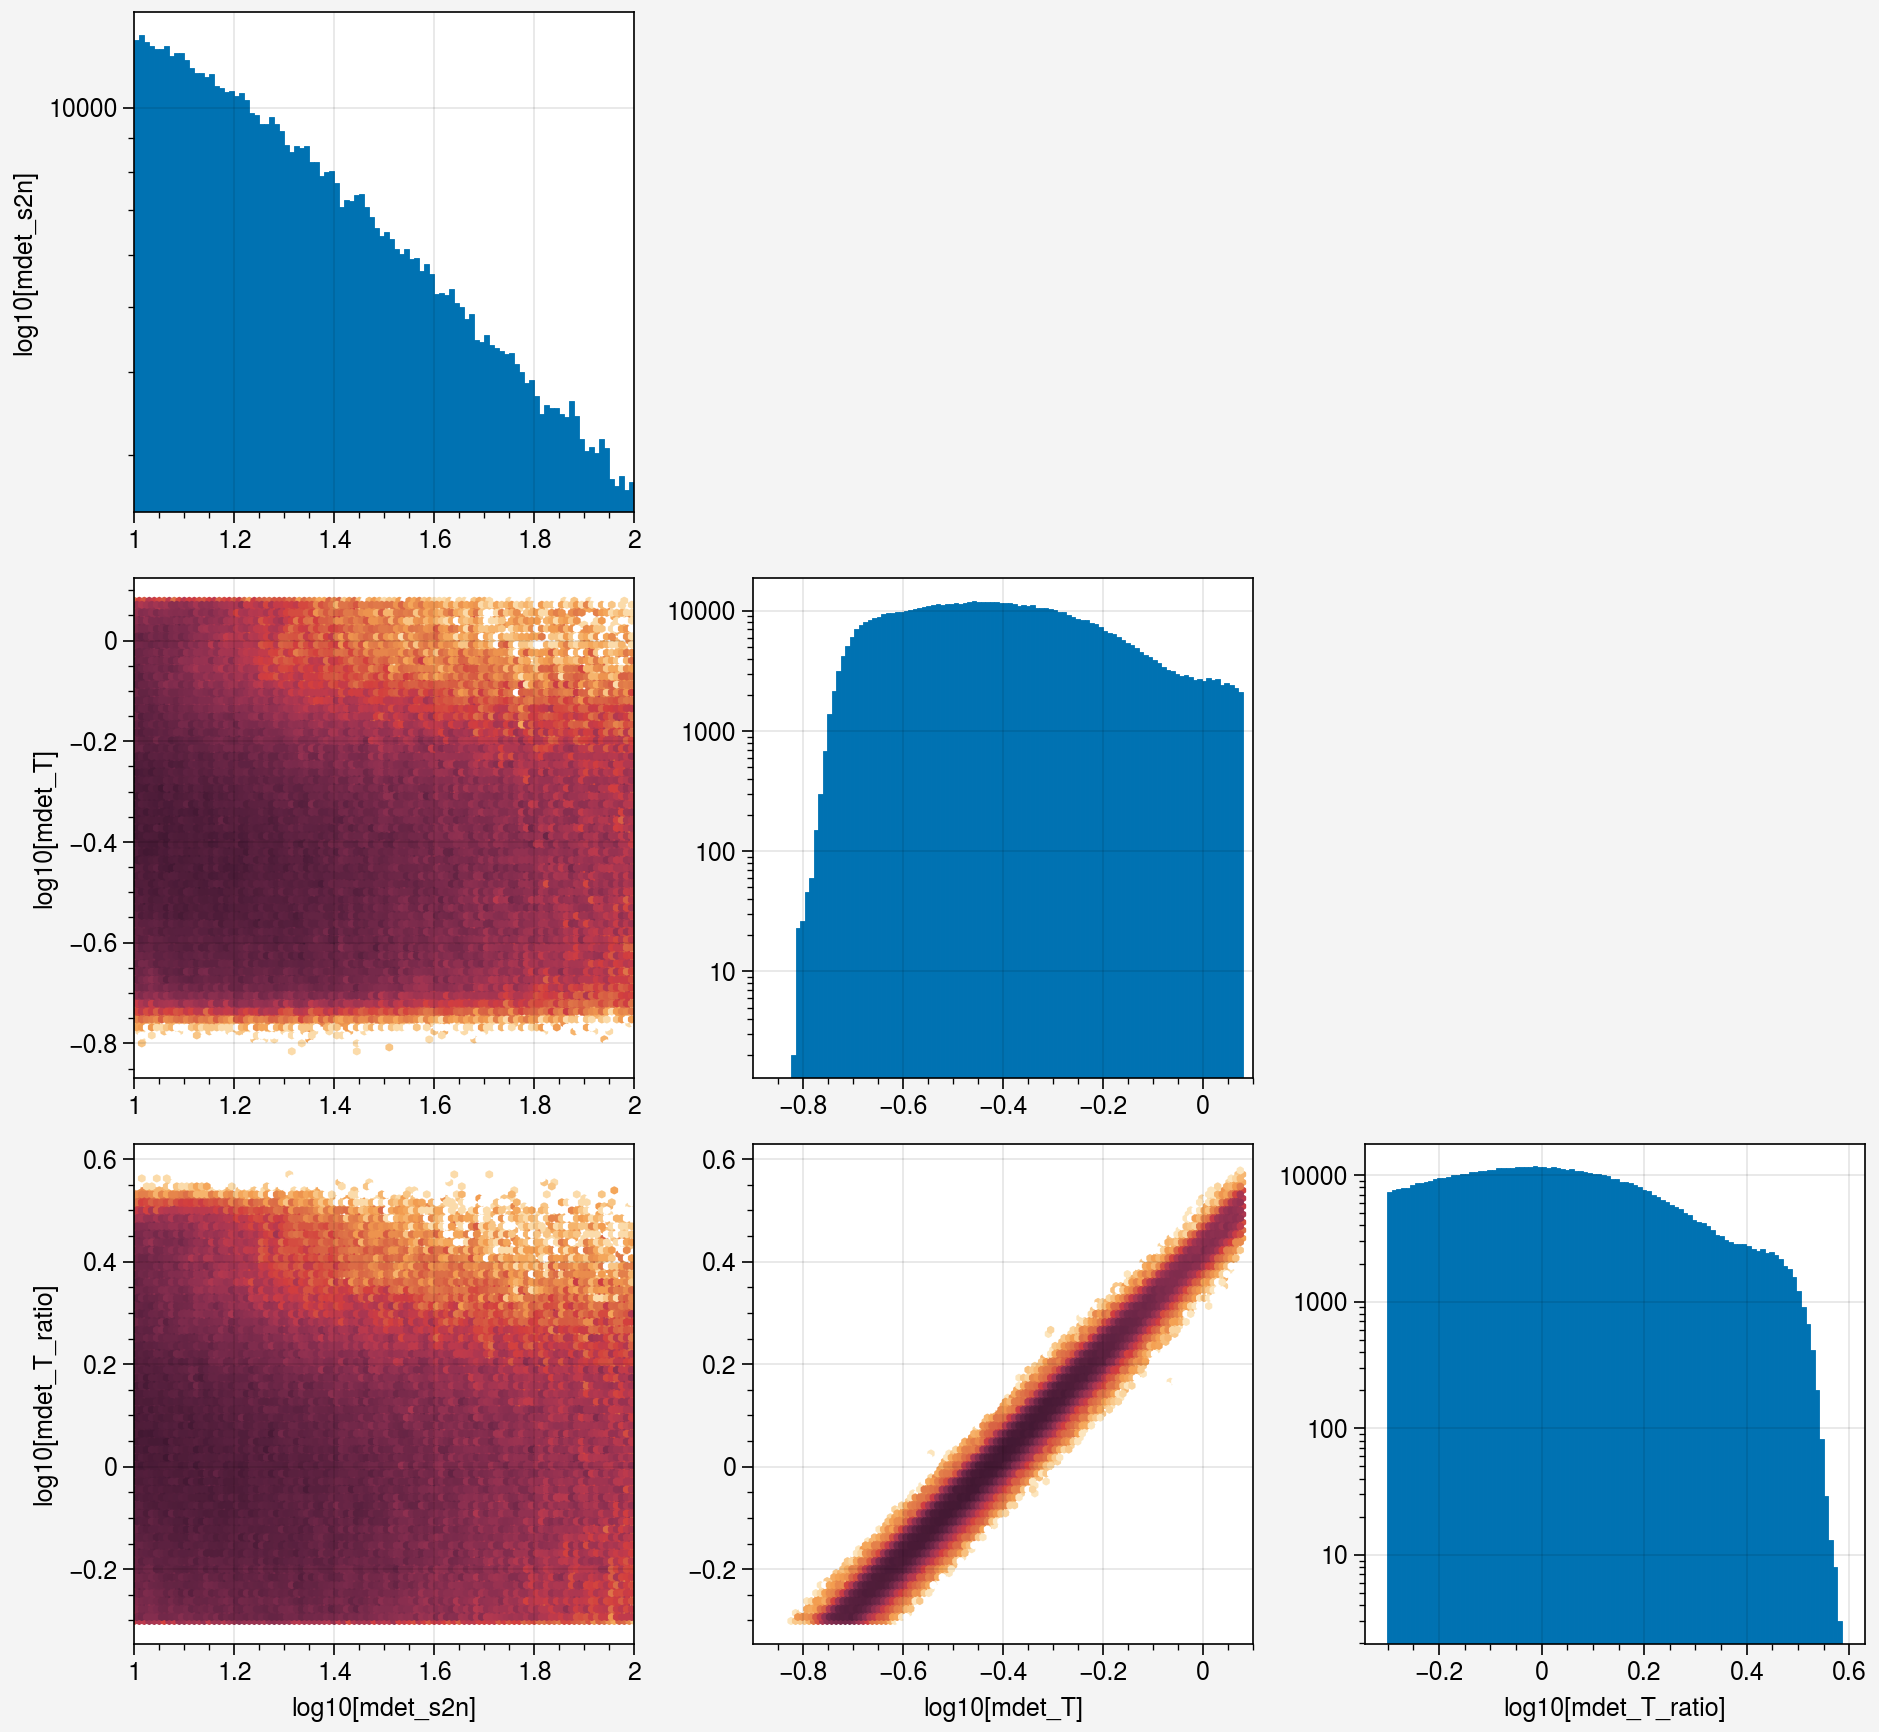

In [10]:
keys = ["mdet_s2n", "mdet_T", "mdet_T_ratio"]
n_keys = len(keys)

fig, axs = pplt.subplots(nrows=n_keys, ncols=n_keys, share=0)
for i in range(n_keys):
    ax = axs[i, i]
    ax.hist(np.log10(d[keys[i]][msk]), bins=100, log=True)

    if i == n_keys - 1:
        ax.set_xlabel("log10[%s]" % keys[i])
        
    if i == 0:
        ax.set_ylabel("log10[%s]" % keys[i])
        ax.set_xlim(1, 2)
        
    if i == 1:
        ax.set_xlim(-0.9, 0.1)

    for j in range(i+1, n_keys):
        ax = axs[j, i]
        ax.hexbin(
            np.log10(d[keys[i]][msk]), 
            np.log10(d[keys[j]][msk]), 
            norm="log",
        )
        
        if j == n_keys - 1:
            ax.set_xlabel("log10[%s]" % keys[i])

        if i == 0:
            ax.set_ylabel("log10[%s]" % keys[j])
            ax.set_xlim(1, 2)

        if i == 1:
            ax.set_xlim(-0.9, 0.1)

    for j in range(0, i):
        ax = axs[j, i]
        ax.axis("off")

    
        